### 1. Importación de Librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = '/content/drive/MyDrive/data/'

### 2. Inicialización de Datos

- DataFrame de Viajes

In [3]:
# data
rides = pd.read_csv("data/PFDA_rides.csv")

- DataFrame de Clima

In [4]:
weather = pd.read_csv(f"data/PFDA_weather.csv")

### 3. Exploración Inicial de los Datos

#### DATOS DE LOS VIAJES

In [5]:
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,11.0,1,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,7.0,1,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,26.0,1,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,9.0,1,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


- Existen diferentes tipos de viajes.
- El precio varía por cada tipo de viaje.


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  float64
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  int64  
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


- Hay 693071 registros en total.
- Tenemos 10 columnas, contando con tipos de valores enteros, flotantes y objeto.

In [7]:
rides['time_stamp'] = pd.to_datetime(rides['time_stamp'], unit='ms')
rides['day'] = rides['time_stamp'].dt.day_name()
rides.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,day
0,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,5.0,1,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,Sunday
1,0.44,Lyft,2018-12-16 08:46:40,North Station,Haymarket Square,11.0,1,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,Sunday


- Corregimos de una vez el tipo de dato de 'time_stamp', para poder manejar operaciones correctamente con las fechas y horas.

In [8]:
rides.groupby("cab_type")["name"].value_counts()

cab_type  name        
Lyft      Lux             51235
          Lux Black       51235
          Lux Black XL    51235
          Lyft            51235
          Lyft XL         51235
          Shared          51233
Uber      Black SUV       55096
          UberXL          55096
          WAV             55096
          Black           55095
          Taxi            55095
          UberX           55094
          UberPool        55091
Name: count, dtype: int64

- Damos un vistazo a los tipos de servicio por empresa y su distribución numérica, que sorprendemente, es muy similar.

In [9]:
rides.surge_multiplier.unique()

array([1, 2, 3])

- Observamos que hay 3 multiplicadores de tarifa dinámica posibles.

In [10]:
rides.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,693071,637976.000000,693071.000000
mean,2.189430,2018-12-05 21:35:09.213053184,16.545125,1.014287
min,0.020000,2018-11-26 02:40:00,2.500000,1.000000
25%,1.280000,2018-11-28 21:20:00,9.000000,1.000000
50%,2.160000,2018-12-02 08:40:00,13.500000,1.000000
75%,2.920000,2018-12-14 23:26:40,22.500000,1.000000
max,7.860000,2018-12-18 19:06:40,97.500000,3.000000
std,1.138937,NaN,9.324359,0.118818


- Hallamos estadísticos relevantes para analizar.
- Todo parece uniforme excepto la variable 'precio', que tiene la media un poco por encima de la mediana, indicando un sesgo positivo.

#### 3.1  Exploración de Tipos de Viajes

In [11]:
rides["name"].nunique()

13

In [12]:
rides.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

- Tenemos 13 tipos de viajes disponibles.

#### 3.2  Exploración de Lugares de Partida

In [13]:
rides.source.nunique()

12

In [14]:
rides.source.unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

- Tenemos 12 puntos de partida.

####  3.3 Exploración de Lugares de Destino

In [15]:
rides.destination.nunique()

12

In [16]:
rides.destination.unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

- Tenemos 12 puntos de destino.

#### 3.4  Exploración de Empresas con las que Trabajamos

In [17]:
rides["cab_type"].nunique()

2

In [18]:
rides["cab_type"].unique()

array(['Lyft', 'Uber'], dtype=object)

- Tenemos 2 empresas de viajes en automóvil.

#### DATOS DE LAS CONDICIONES CLIMÁTICAS

In [19]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [20]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


- Tenemos 6276 registros en total.
- Hay 8 columnas con el tipo de dato flotante en su mayoría. Tenemos también tipos enteros y objeto.

In [21]:
weather['time_stamp'] = pd.to_datetime(weather['time_stamp'], unit='s')
weather['day'] = weather['time_stamp'].dt.day_name()
weather.head(2)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,day
0,42.42,Back Bay,1.0,1012.14,0.1228,2018-12-16 23:45:01,0.77,11.25,Sunday
1,42.43,Beacon Hill,1.0,1012.15,0.1846,2018-12-16 23:45:01,0.76,11.32,Sunday


- Corregimos el tipo de dato de time_stamp para poder realizar operaciones con fechas y horas sin incovenientes luego.

In [22]:
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6276,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,2018-12-03 17:16:17.146430720,0.763985,6.802812
min,19.620000,0.000000,988.250000,0.000200,2018-11-26 03:40:44,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,2018-11-28 06:34:30,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,2018-11-29 17:52:54,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,2018-12-13 08:45:01,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,2018-12-18 18:45:02,0.990000,18.180000
std,6.022055,0.314284,12.870775,0.100758,NaN,0.127340,3.633466


- Hallamos estadísticos principales para análisis.
- En general casi todos los valores se ven uniformes, excepto 'clouds' y 'rain', que tienen variaciones entre su media y mediana. En el caso de 'clouds' es más significativo y tiene sesgo negativo, mientras que en 'rain' es un pequeño sesgo positivo.

#### 3.5  Exploración de Lugares con Registros Climáticos

In [23]:
weather.location.nunique()

12

In [24]:
weather.location.unique()

array(['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway',
       'Financial District', 'Haymarket Square', 'North End',
       'North Station', 'Northeastern University', 'South Station',
       'Theatre District', 'West End'], dtype=object)

- Tenemos 12 lugares con registros climáticos.

#### 3.6  Análisis de Media en Todas las Variables

In [25]:
weather.groupby("location").mean(numeric_only=True)

,temp,clouds,pressure,rain,humidity,wind
location,,,,,,
Back Bay,39.082122,0.678432,1008.447820,0.056012,0.764073,6.778528
Beacon Hill,39.047285,0.677801,1008.448356,0.057097,0.765048,6.810325
Boston University,39.047744,0.679235,1008.459254,0.054688,0.763786,6.692180
Fenway,38.964379,0.679866,1008.453289,0.054863,0.767266,6.711721
Financial District,39.410822,0.676730,1008.435793,0.061352,0.754837,6.860019
Haymarket Square,39.067897,0.676711,1008.445239,0.059593,0.764837,6.843193
North End,39.090841,0.676730,1008.441912,0.058712,0.764054,6.853117
North Station,39.035315,0.676998,1008.442811,0.056542,0.765545,6.835755
Northeastern University,38.975086,0.678317,1008.444168,0.054197,0.767648,6.749426


- Los lugares tienden a tener condiciones climáticas casi similares en promedio.

### 4. Evaluación de Calidad de Datos

#### DATOS DE LOS VIAJES

####  4.1 Duplicados

In [26]:
rides.duplicated().sum()

np.int64(0)

- No existen valores duplicados para los datos de los viajes.

#### 4.2 Nulos

In [27]:
rides.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
day                     0
dtype: int64

- Tenemos 55095 valores nulos en la columna de 'precio'.

In [28]:
porcentaje_nulos = (rides["price"].isnull().mean() * 100).round(2)
print(f"Porcentaje de valores nulos en price: {porcentaje_nulos}%")

Porcentaje de valores nulos en price: 7.95%


- El porcentaje de nulos con respecto al total de datos es de 7.95%.

#### 4.3  Imputación de Datos

Antes de tomar una decisión, profundizamos un poco más en ver si por ejemplo, hay alguna o varías categoría de transporte que tienen precios nulos.

In [29]:
rides.loc[rides["price"].isnull()==True,"name"].unique()

array(['Taxi'], dtype=object)

In [30]:
rides.loc[rides["name"]=="Taxi", "cab_type"].unique()

array(['Uber'], dtype=object)

- Observamos que la única categoría a la que le pertenecen esos datos nulos es la categoría 'Taxi' perteneciente a Uber. Miramos más a fondo.

In [31]:
rides.loc[rides["name"]=="Taxi", "price"].isnull().count()

np.int64(55095)

In [32]:
rides.loc[rides["name"]=="Taxi", "id"].count()

np.int64(55095)

- Haciendo la comparación, en realidad toda la categoría 'Taxi' tiene sus precios nulos, por lo que no podemos tomar ninguna referencia cercana a la realidad para imputar sus datos. Por lo que vamos a hacer lo siguiente: Primero, crearemos una copia del DataFrame pero con los nulos eliminados, borrando así prácticamente toda la categoría 'Taxi' como si no existiera.

In [33]:
rides_noprice = rides.copy()
rides_noprice = rides_noprice.dropna(subset=["price"], inplace=True)

- Ahora, para el DataFrame original de viajes, vamos a imputar los valores nulos con la mediana, que en presencia de bastantes outliers es un estadístico robusto. Así no afectamos mucho la distribución original de los datos.

In [34]:
rides["price"] = rides.groupby("cab_type")["price"].transform(lambda x: x.fillna(x.median()))

- Imputamos los datos de precio nulos con la mediana de cada empresa.

In [35]:
rides.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
day                 0
dtype: int64

- Ya no tenemos valores nulos.
- Se imputaron correctamente los datos!

#### 4.4 Outliers

In [36]:
num_cols = ["distance", "time_stamp", "price", "surge_multiplier"]

- Seleccionamos las columnas numéricas.

In [37]:
Q1 = rides[num_cols].quantile(0.25)
Q3 = rides[num_cols].quantile(0.75)
IQR = Q3 - Q1

- Calculamos los cuartiles y el rango intercuartílico.

In [38]:
Q1

distance                           1.28
time_stamp          2018-11-28 21:20:00
price                               9.5
surge_multiplier                    1.0
Name: 0.25, dtype: object

- Primer cuartil.

In [39]:
Q3

distance                           2.92
time_stamp          2018-12-14 23:26:40
price                              22.5
surge_multiplier                    1.0
Name: 0.75, dtype: object

- Tercer cuartil.

In [40]:
IQR

distance                        1.64
time_stamp          16 days 02:06:40
price                           13.0
surge_multiplier                 0.0
dtype: object

- Rango intercuartílico.

In [41]:
lower_limit = Q1 - 1.5 * IQR # límite inferior
upper_limit = Q3 + 1.5 * IQR # límite superior


- Calculamos los límites superiores e inferiores de los bigotes.

In [42]:
lower_limit

distance                          -1.18
time_stamp          2018-11-04 18:10:00
price                             -10.0
surge_multiplier                    1.0
dtype: object

- Límite inferior.

In [43]:
upper_limit

distance                           5.38
time_stamp          2019-01-08 02:36:40
price                              42.0
surge_multiplier                    1.0
dtype: object

- Límite superior.

In [44]:
num_outliers_dist = ((rides["distance"] < lower_limit["distance"]) | (rides["distance"] > upper_limit["distance"])).sum()
porcent_outliers_dist = (num_outliers_dist / len(rides) * 100).round(2)

num_outliers_time = ((rides["time_stamp"] < lower_limit["time_stamp"]) | (rides["time_stamp"] > upper_limit["time_stamp"])).sum()
porcent_outliers_time = (num_outliers_time / len(rides) * 100).round(2)

num_outliers_price = ((rides["price"] < lower_limit["price"]) | (rides["price"] > upper_limit["price"])).sum()
porcent_outliers_price = (num_outliers_price / len(rides) * 100).round(2)

num_outliers_surge = ((rides["surge_multiplier"] < lower_limit["surge_multiplier"]) | (rides["surge_multiplier"] > upper_limit["surge_multiplier"])).sum()
porcent_outliers_surge = (num_outliers_surge / len(rides) * 100).round(2)

print(f"El número de outliers en la columna 'distance' es: {num_outliers_dist}, correspondiendo al {porcent_outliers_dist}% del total de datos.")
print(f"El número de outliers en la columna 'time_stamp' es: {num_outliers_time}, correspondiendo al {porcent_outliers_time}% del total de datos.")
print(f"El número de outliers en la columna 'price' es: {num_outliers_price}, correspondiendo al {porcent_outliers_price}% del total de datos.")
print(f"El número de outliers en la columna 'surge_multiplier' es: {num_outliers_surge}, correspondiendo al {porcent_outliers_surge}% del total de datos.")

El número de outliers en la columna 'distance' es: 8662, correspondiendo al 1.25% del total de datos.
El número de outliers en la columna 'time_stamp' es: 0, correspondiendo al 0.0% del total de datos.
El número de outliers en la columna 'price' es: 7982, correspondiendo al 1.15% del total de datos.
El número de outliers en la columna 'surge_multiplier' es: 9890, correspondiendo al 1.43% del total de datos.


- No hay muchos outliers realmente, por lo que no me parece muy necesario winsorizar las variables.

#### DATOS DE LAS CONDICIONES CLIMÁTICAS

#### 4.5  Duplicados

In [45]:
weather.duplicated().sum()

np.int64(0)

- No hay valores duplicados para los datos de las condiciones climáticas.

#### 4.6 Nulos

In [46]:
weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
day              0
dtype: int64

- Tenemos 5382 valores nulos para la columna 'lluvia'.

In [47]:
porcentaje_nulos = (weather["rain"].isnull().mean() * 100).round(2)
print(f"Porcentaje de valores nulos en rain: {porcentaje_nulos}%")

Porcentaje de valores nulos en rain: 85.76%


- El porcentaje de nulos con respecto al total de datos es de 85.76%.
- Un valor muy alto, y analizando con detenimiento, si hablamos de lluvia puede que los valores nulos representen que no hubo lluvia en ese momento.

In [48]:
weather[weather["rain"] == 0]

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,day


- Corroboramos que no haya valores de 0 en la columna 'lluvia', ya que de ser el caso, el nulo no necesariamente represente una cantidad nula de lluvia.
- Al no haber valores de 0, asumimos que la cantidad nula de lluvia es porque no hubo lluvia. Es decir, 'rain' = 0.

In [49]:
weather["rain"] = weather["rain"].fillna(0)

- Imputamos los datos nulos con el valor de 0.

#### 4.7  Outliers

In [50]:
num_cols = ["temp", "pressure", "rain", "humidity", "wind"]

- Seleccionamos las columnas numéricas.

In [51]:
Q1 = weather[num_cols].quantile(0.25)
Q3 = weather[num_cols].quantile(0.75)
IQR = Q3 - Q1

- Calculamos los cuartiles y el rango intercuartílico.

In [52]:
Q1

temp         36.0775
pressure    997.7475
rain          0.0000
humidity      0.6700
wind          3.5175
Name: 0.25, dtype: float64

- Primer cuartil.

In [53]:
Q3

temp          42.8325
pressure    1018.4800
rain           0.0000
humidity       0.8900
wind           9.9200
Name: 0.75, dtype: float64

- Tercer cuartil.

In [54]:
IQR

temp         6.7550
pressure    20.7325
rain         0.0000
humidity     0.2200
wind         6.4025
dtype: float64

- Rango intercuartílico.

In [55]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

- Calculamos los límites superiores e inferiores de los bigotes.

In [56]:
lower_limit

temp         25.94500
pressure    966.64875
rain          0.00000
humidity      0.34000
wind         -6.08625
dtype: float64

- Límite inferior.

In [57]:
upper_limit

temp          52.96500
pressure    1049.57875
rain           0.00000
humidity       1.22000
wind          19.52375
dtype: float64

- Límite superior.

In [58]:
num_outliers_temp = ((weather["temp"] < lower_limit["temp"]) | (weather["temp"] > upper_limit["temp"])).sum()
porcent_outliers_temp = (num_outliers_temp / len(weather) * 100).round(2)

num_outliers_pres = ((weather["pressure"] < lower_limit["pressure"]) | (weather["pressure"] > upper_limit["pressure"])).sum()
porcent_outliers_pres = (num_outliers_pres / len(weather) * 100).round(2)

num_outliers_rain = ((weather["rain"] < lower_limit["rain"]) | (weather["rain"] > upper_limit["rain"])).sum()
porcent_outliers_rain = (num_outliers_rain / len(weather) * 100).round(2)

num_outliers_humid = ((weather["humidity"] < lower_limit["humidity"]) | (weather["humidity"] > upper_limit["humidity"])).sum()
porcent_outliers_humid = (num_outliers_humid / len(weather) * 100).round(2)

num_outliers_wind = ((weather["wind"] < lower_limit["wind"]) | (weather["wind"] > upper_limit["wind"])).sum()
porcent_outliers_wind = (num_outliers_wind / len(weather) * 100).round(2)

print(f"El número de outliers en la columna 'temp' es: {num_outliers_temp}, correspondiendo al {porcent_outliers_temp}% del total de datos.")
print(f"El número de outliers en la columna 'pressure' es: {num_outliers_pres}, correspondiendo al {porcent_outliers_pres}% del total de datos.")
print(f"El número de outliers en la columna 'rain' es: {num_outliers_rain}, correspondiendo al {porcent_outliers_rain}% del total de datos.")
print(f"El número de outliers en la columna 'humidity' es: {num_outliers_humid}, correspondiendo al {porcent_outliers_humid}% del total de datos.")
print(f"El número de outliers en la columna 'wind' es: {num_outliers_wind}, correspondiendo al {porcent_outliers_wind}% del total de datos.")

El número de outliers en la columna 'temp' es: 266, correspondiendo al 4.24% del total de datos.
El número de outliers en la columna 'pressure' es: 0, correspondiendo al 0.0% del total de datos.
El número de outliers en la columna 'rain' es: 894, correspondiendo al 14.24% del total de datos.
El número de outliers en la columna 'humidity' es: 0, correspondiendo al 0.0% del total de datos.
El número de outliers en la columna 'wind' es: 0, correspondiendo al 0.0% del total de datos.


#### ------------------ REFLEXIÓN ------------------

Para los datos de 'weather':
- Se observaron algunos valores fuera del rango esperado principalmente en las variables rain y temp.
- Estos representan condiciones climáticas inusuales más que errores, por lo que se conservaron para no perder información relevante del comportamiento real del clima.  

Para los datos de 'rides':
- Se identificaron valores atípicos en la variable price, distance y surge_multiplier.
- Estos valores podrían corresponder a viajes de lujo, trayectos largos o errores de registro.

La presencia de estos outliers puede afectar las medidas de tendencia central, como la media, haciendo que los precios promedio parezcan más altos de lo real. Por ello, es importante analizarlos antes de realizar comparaciones o modelos estadísticos.

### 5.  Análisis de Distribución de Variables

<Axes: xlabel='price', ylabel='Count'>

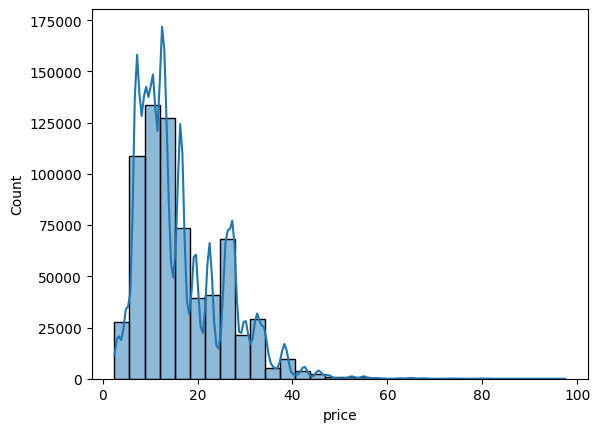

In [59]:
sns.histplot(rides["price"], bins=30, kde=True)

El gráfico muestra que la mayoría de los precios de los viajes se concentran en el rango bajo, con una distribución sesgada hacia la derecha. Hay algunos valores atípicos con precios significativamente más altos, lo que indica que existen viajes más caros, pero son menos frecuentes.

<Axes: xlabel='cab_type', ylabel='price'>

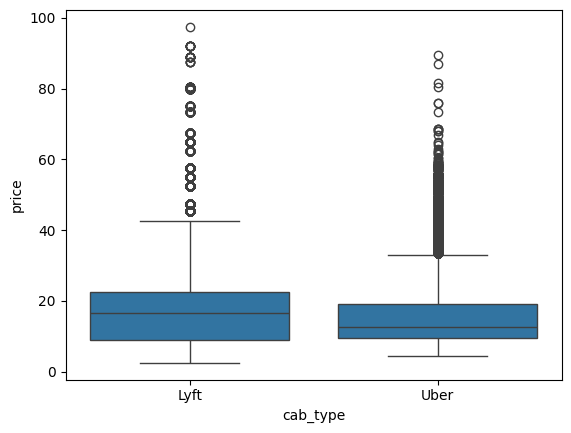

In [60]:
sns.boxplot(x="cab_type", y="price", data=rides)

Se observa que la empresa Lyft tiene la distribución de precios ligeramente más amplia, lo que indica una mayor variabilidad en los precios de sus viajes en comparación con Uber. La mediana de Lyft está un poco más alta que la de Uber, lo que sugiere que, en promedio, los precios de los viajes en Lyft tienden a ser superiores a los de Uber. Además, ambos gráficos muestran la presencia de algunos valores atípicos (Con Lyft teniendo los más altos, por supuesto), pero no parecen ser excesivos ni afectar significativamente la distribución general de los precios en ambas empresas.

<Axes: xlabel='distance', ylabel='Count'>

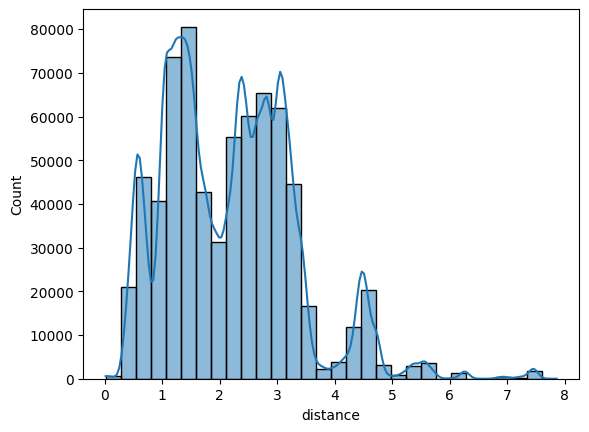

In [61]:
sns.histplot(rides["distance"], bins=30, kde=True)

El gráfico muestra que la distancia de los viajes tiene una distribución sesgada hacia la derecha, con la mayoría de los viajes concentrados en distancias más cortas. Hay una disminución gradual en la frecuencia de los viajes a medida que la distancia aumenta, lo que indica que los viajes más largos son menos comunes.

<Axes: xlabel='destination', ylabel='source'>

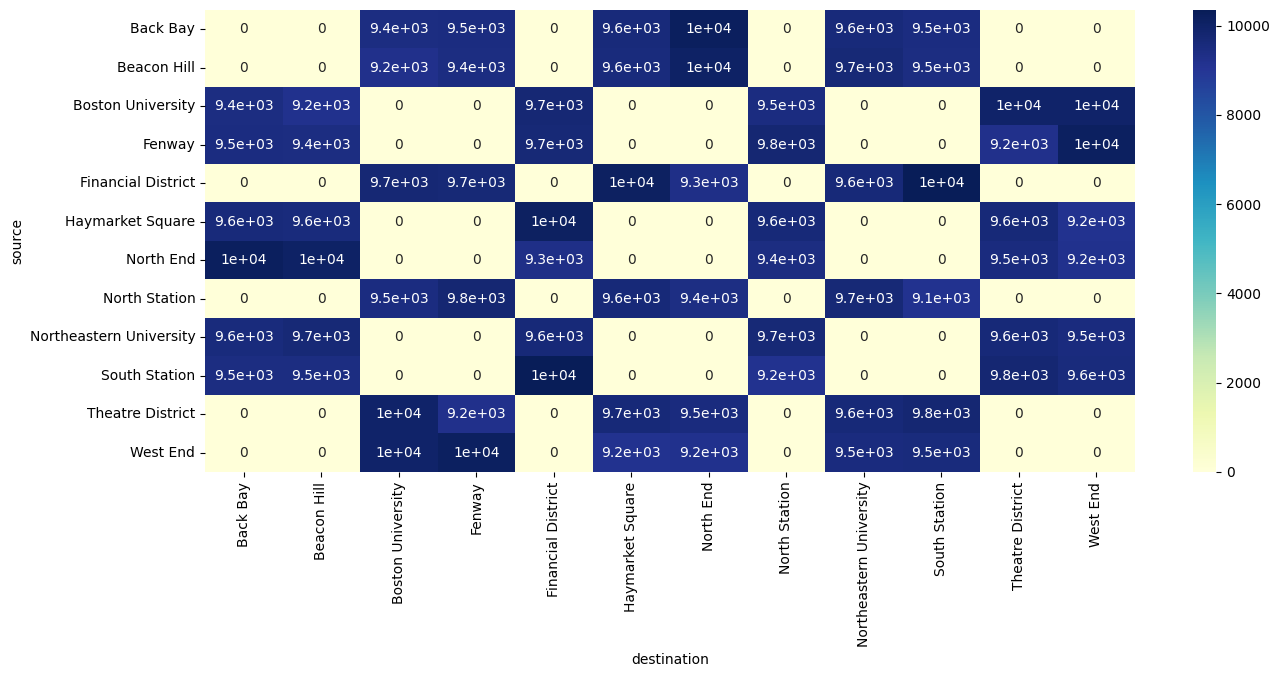

In [62]:
tabla = pd.crosstab(rides["source"], rides["destination"])

plt.figure(figsize=(15, 6))
sns.heatmap(tabla, annot=True, cmap="YlGnBu")

En el mapa de calor se observa que ciertas combinaciones de origen y destino tienen una mayor frecuencia de viajes, lo que indica rutas populares entre los usuarios. Todas tienen una frecuencia similar, por lo que aunque sean las usuales de los usuarios, no hay una favorita que se superponga muy por encima de las demás.

###---------------------------- ANÁLISIS EXPLORATORIO AVANZADO ----------------------------

#### Análisis de Variaciones de Precios por Factores Geográficos

### Analisis del clima

In [63]:
rides["time_stamp"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 693071 entries, 0 to 693070
Series name: time_stamp
Non-Null Count   Dtype         
--------------   -----         
693071 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.3 MB


- verificamos el tipo de dato de la columna time_stamp en el dataset de viajes

In [64]:
weather["time_stamp"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6276 entries, 0 to 6275
Series name: time_stamp
Non-Null Count  Dtype         
--------------  -----         
6276 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 49.2 KB


- verificamos el tipo de dato de la columna time_stamp en el dataset de condiciones climaticas

In [65]:
weather["time_stamp"] = pd.to_datetime(weather["time_stamp"])


- Convertimos time_stamp a formato datetime


In [66]:
weather["day"] = weather["time_stamp"].dt.date


- Creamos la columna day utlizando unicamente la fecha


In [67]:
weather[["time_stamp", "day", "temp", "rain", "humidity", "wind"]].head()

,time_stamp,day,temp,rain,humidity,wind
0,2018-12-16 23:45:01,2018-12-16,42.42,0.1228,0.77,11.25
1,2018-12-16 23:45:01,2018-12-16,42.43,0.1846,0.76,11.32
2,2018-12-16 23:45:01,2018-12-16,42.50,0.1089,0.76,11.07
3,2018-12-16 23:45:01,2018-12-16,42.11,0.0969,0.77,11.09
4,2018-12-16 23:45:01,2018-12-16,43.13,0.1786,0.75,11.49


- visualizaciones de las columnas relevantes del clima

In [68]:
clima_dia = weather.groupby("day")[["temp","rain","humidity","wind"]].mean()
clima_dia.head()

,temp,rain,humidity,wind
day,,,,
2018-11-26,42.068838,0.003969,0.904049,3.623850
2018-11-27,43.373713,0.060072,0.863260,10.051126
2018-11-28,37.161044,0.000054,0.729768,7.817173
2018-11-29,38.849635,0.000114,0.672995,10.172448
2018-11-30,35.608267,0.000000,0.713167,3.783233


- calculamos los promedios diarios 

In [69]:
clima_dia = clima_dia.reset_index()
clima_dia["llueve"] = clima_dia["rain"] > 0

- identificamos que dias tuvieron lluvia

In [70]:
dias_lluvia = clima_dia["llueve"].sum()
dias_sin_lluvia = (~clima_dia["llueve"]).sum()
total_dias = len(clima_dia)
print("Días con lluvia:", dias_lluvia)
print("Días sin lluvia:", dias_sin_lluvia)
print("Total de días analizados:", total_dias)

Días con lluvia: 11
Días sin lluvia: 6
Total de días analizados: 17


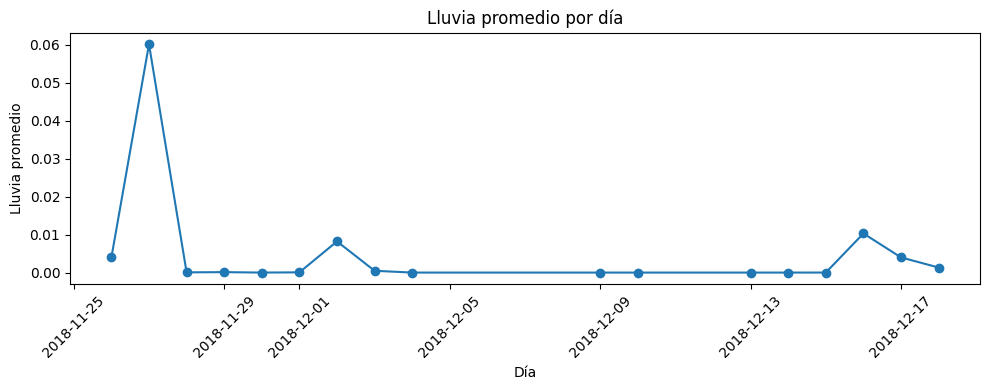

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(clima_dia["day"], clima_dia["rain"], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Día")
plt.ylabel("Lluvia promedio")
plt.title("Lluvia promedio por día")
plt.tight_layout()
plt.show()

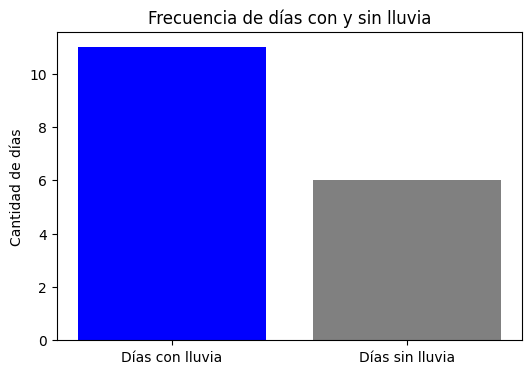

In [72]:
labels = ["Días con lluvia", "Días sin lluvia"]
counts = [dias_lluvia, dias_sin_lluvia]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=["blue", "gray"])
plt.ylabel("Cantidad de días")
plt.title("Frecuencia de días con y sin lluvia")
plt.show()

- contamos dias con luvia y dias sin lluvia

In [73]:
temp_con_lluvia = clima_dia[clima_dia["llueve"]]["temp"].mean()
temp_sin_lluvia = clima_dia[~clima_dia["llueve"]]["temp"].mean()
print("Temperatura promedio en días con lluvia:",round(temp_con_lluvia,2))
print("Temperatura promedio en días sin lluvia:",round(temp_sin_lluvia,2) )

Temperatura promedio en días con lluvia: 40.51
Temperatura promedio en días sin lluvia: 33.04


- temperatura promedio sengun el clima  lluvioso

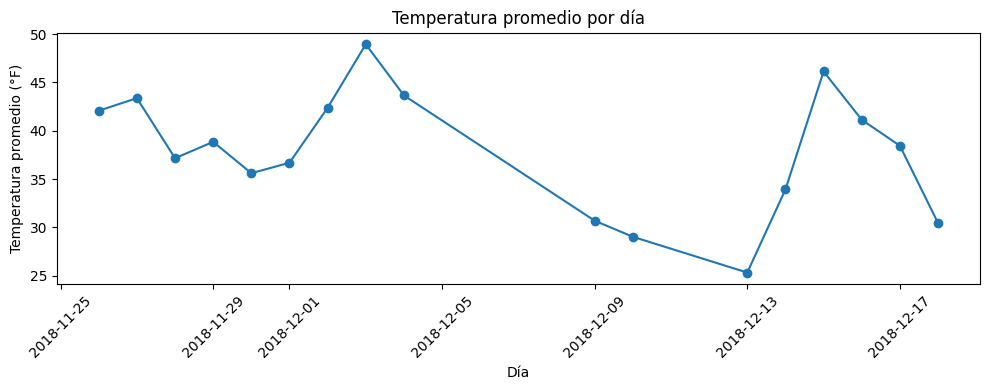

In [74]:
plt.figure(figsize=(10,4))
plt.plot(clima_dia["day"], clima_dia["temp"], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Día")
plt.ylabel("Temperatura promedio (°F)")
plt.title("Temperatura promedio por día")
plt.tight_layout()
plt.show()

*precio promedio por dia*

In [75]:
rides["time_stamp"] = pd.to_datetime(rides["time_stamp"])
rides["day"] = rides["time_stamp"].dt.date

In [76]:
precios_por_dia = rides.groupby("day")["price"].mean().reset_index()
precios_por_dia.head()

,day,price
0,2018-11-26,15.145602
1,2018-11-27,15.916281
2,2018-11-28,15.898575
3,2018-11-29,15.954249
4,2018-11-30,16.473163


In [95]:
df_final = clima_dia.join(
    precios_por_dia.set_index("day"),
    on="day"
)
df_final

,day,temp,rain,humidity,wind,llueve,humedo,ventoso,price
0,2018-11-26,42.068838,0.003969,0.904049,3.623850,True,True,False,15.145602
1,2018-11-27,43.373713,0.060072,0.863260,10.051126,True,True,True,15.916281
2,2018-11-28,37.161044,0.000054,0.729768,7.817173,True,True,True,15.898575
3,2018-11-29,38.849635,0.000114,0.672995,10.172448,True,False,True,15.954249
4,2018-11-30,35.608267,0.000000,0.713167,3.783233,False,False,False,16.473163
5,2018-12-01,36.692160,0.000059,0.705031,3.440309,True,False,False,16.261421
6,2018-12-02,42.379549,0.008200,0.892014,3.883021,True,True,False,16.642938
7,2018-12-03,48.947778,0.000473,0.804201,5.706424,True,True,False,16.093162
8,2018-12-04,43.653889,0.000000,0.619167,7.761667,False,False,True,15.213233
9,2018-12-09,30.692917,0.000000,0.569583,5.530000,False,False,False,NaN


In [78]:
precio_con_lluvia = df_final[df_final["llueve"]]["price"].mean()
precio_sin_lluvia = df_final[~df_final["llueve"]]["price"].mean()

print("Precio promedio en días con lluvia:", round(precio_con_lluvia, 2))
print("Precio promedio en días sin lluvia:", round(precio_sin_lluvia, 2))

Precio promedio en días con lluvia: 16.1
Precio promedio en días sin lluvia: 16.35


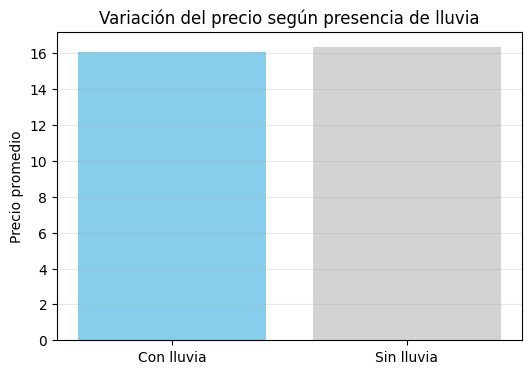

In [79]:
labels = ["Con lluvia", "Sin lluvia"]
precios = [precio_con_lluvia, precio_sin_lluvia]

plt.figure(figsize=(6,4))
plt.bar(labels, precios, color=["skyblue", "lightgray"])
plt.ylabel("Precio promedio")
plt.title("Variación del precio según presencia de lluvia")
plt.grid(axis="y", alpha=0.3)
plt.show()

*precio por Humedad*

In [80]:
humedad_promedio = clima_dia["humidity"].mean()
print(humedad_promedio)

0.7266552727042161


In [81]:
clima_dia["humedo"] = clima_dia["humidity"] > humedad_promedio
clima_dia.head()

,day,temp,rain,humidity,wind,llueve,humedo
0,2018-11-26,42.068838,0.003969,0.904049,3.623850,True,True
1,2018-11-27,43.373713,0.060072,0.863260,10.051126,True,True
2,2018-11-28,37.161044,0.000054,0.729768,7.817173,True,True
3,2018-11-29,38.849635,0.000114,0.672995,10.172448,True,False
4,2018-11-30,35.608267,0.000000,0.713167,3.783233,False,False


In [82]:
precios_por_dia = rides.groupby("day")["price"].mean().reset_index()
print(precios_por_dia)

           day      price
0   2018-11-26  15.145602
1   2018-11-27  15.916281
2   2018-11-28  15.898575
3   2018-11-29  15.954249
4   2018-11-30  16.473163
5   2018-12-01  16.261421
6   2018-12-02  16.642938
7   2018-12-03  16.093162
8   2018-12-04  15.213233
9   2018-12-10  16.117158
10  2018-12-13  16.605417
11  2018-12-14  17.357056
12  2018-12-15  16.615997
13  2018-12-16  16.628109
14  2018-12-17  15.919844
15  2018-12-18  15.982818


In [83]:
df_humedad = clima_dia.join(
    precios_por_dia.set_index("day"),
    on="day"
)
df_humedad.head()

,day,temp,rain,humidity,wind,llueve,humedo,price
0,2018-11-26,42.068838,0.003969,0.904049,3.623850,True,True,15.145602
1,2018-11-27,43.373713,0.060072,0.863260,10.051126,True,True,15.916281
2,2018-11-28,37.161044,0.000054,0.729768,7.817173,True,True,15.898575
3,2018-11-29,38.849635,0.000114,0.672995,10.172448,True,False,15.954249
4,2018-11-30,35.608267,0.000000,0.713167,3.783233,False,False,16.473163


In [84]:
precio_humedo = df_humedad[df_humedad["humedo"]]["price"].mean()
precio_no_humedo = df_humedad[~df_humedad["humedo"]]["price"].mean()

print("Precio  promedio con dias humedos:",round(precio_no_humedo,2))
print("Precio promedio sin dias humedos:",round(precio_humedo,2))

Precio  promedio con dias humedos: 16.09
Precio promedio sin dias humedos: 16.25


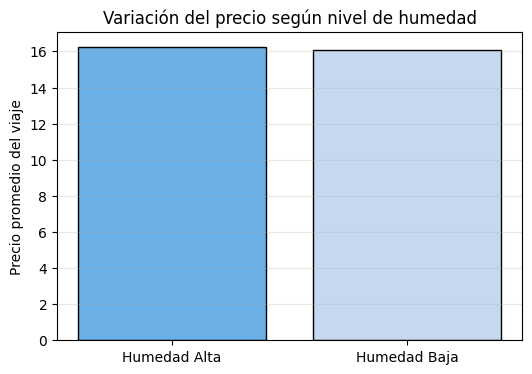

In [85]:
labels = ["Humedad Alta", "Humedad Baja"]
precios = [precio_humedo, precio_no_humedo]

plt.figure(figsize=(6,4))
plt.bar(labels, precios, color=["#6AAFE6", "#C6D8F0"], edgecolor="black")
plt.ylabel("Precio promedio del viaje")
plt.title("Variación del precio según nivel de humedad")
plt.grid(axis="y", alpha=0.3)
plt.show()

*variacion promedio de viento*

In [86]:
viento_promedio = clima_dia["wind"].mean()
print(viento_promedio)

6.434985204593179


In [87]:
clima_dia["ventoso"] = clima_dia["wind"] > viento_promedio
clima_dia["ventoso"]

0     False
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14     True
15     True
16     True
Name: ventoso, dtype: bool

In [88]:
precios_por_dia = rides.groupby("day")["price"].mean().reset_index()
precios_por_dia.head()

,day,price
0,2018-11-26,15.145602
1,2018-11-27,15.916281
2,2018-11-28,15.898575
3,2018-11-29,15.954249
4,2018-11-30,16.473163


In [89]:
df_viento = clima_dia.join(
    precios_por_dia.set_index("day"),
    on="day"
)
df_viento.head()

,day,temp,rain,humidity,wind,llueve,humedo,ventoso,price
0,2018-11-26,42.068838,0.003969,0.904049,3.623850,True,True,False,15.145602
1,2018-11-27,43.373713,0.060072,0.863260,10.051126,True,True,True,15.916281
2,2018-11-28,37.161044,0.000054,0.729768,7.817173,True,True,True,15.898575
3,2018-11-29,38.849635,0.000114,0.672995,10.172448,True,False,True,15.954249
4,2018-11-30,35.608267,0.000000,0.713167,3.783233,False,False,False,16.473163


In [90]:
precio_con_viento = df_viento[df_viento["ventoso"]]["price"].mean()
precio_sin_viento = df_viento[~df_viento["ventoso"]]["price"].mean()

print("Precio  promedio con dias ventosos:",round(precio_con_viento,2))
print("Precio promedio sin dias ventosos:",round(precio_sin_viento,2))

Precio  promedio con dias ventosos: 15.93
Precio promedio sin dias ventosos: 16.37


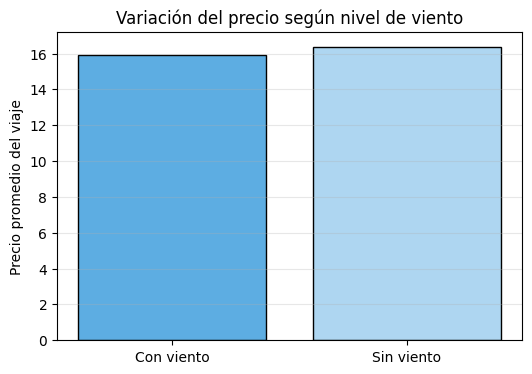

In [91]:
labels = ["Con viento", "Sin viento"]
precios = [precio_con_viento, precio_sin_viento]

plt.figure(figsize=(6,4))
plt.bar(labels, precios, color=["#5DADE2", "#AED6F1"], edgecolor="black")
plt.ylabel("Precio promedio del viaje")
plt.title("Variación del precio según nivel de viento")
plt.grid(axis="y", alpha=0.3)
plt.show()

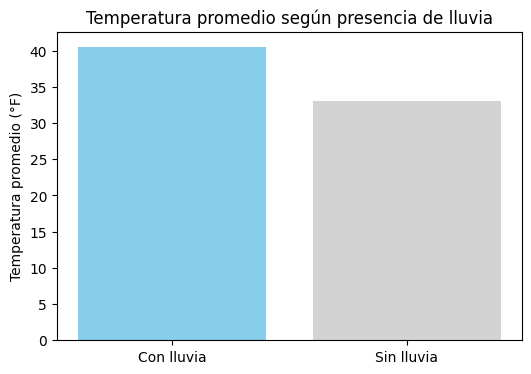

In [92]:
labels = ["Con lluvia", "Sin lluvia"]
temps = [temp_con_lluvia, temp_sin_lluvia]

plt.figure(figsize=(6,4))
plt.bar(labels, temps, color=["skyblue", "lightgray"])
plt.ylabel("Temperatura promedio (°F)")
plt.title("Temperatura promedio según presencia de lluvia")
plt.show()

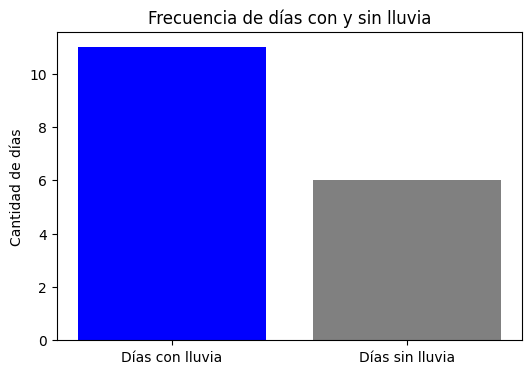

In [93]:
labels = ["Días con lluvia", "Días sin lluvia"]
counts = [dias_lluvia, dias_sin_lluvia]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=["blue", "gray"])
plt.ylabel("Cantidad de días")
plt.title("Frecuencia de días con y sin lluvia")
plt.show()

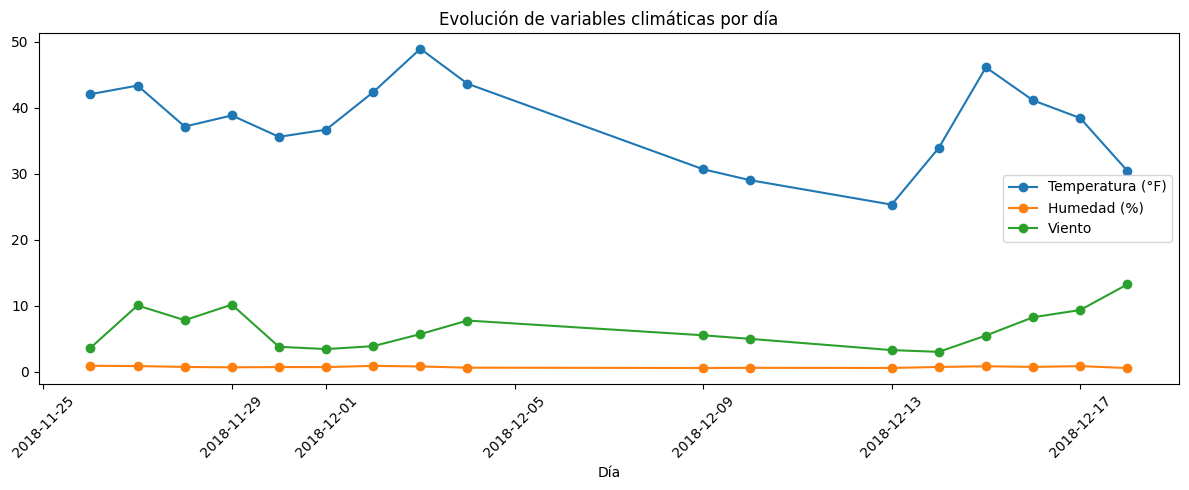

In [94]:
plt.figure(figsize=(12,5))
plt.plot(clima_dia["day"], clima_dia["temp"], label="Temperatura (°F)", marker="o")
plt.plot(clima_dia["day"], clima_dia["humidity"], label="Humedad (%)", marker="o")
plt.plot(clima_dia["day"], clima_dia["wind"], label="Viento", marker="o")

plt.xticks(rotation=45)
plt.xlabel("Día")
plt.title("Evolución de variables climáticas por día")
plt.legend()
plt.tight_layout()
plt.show()